In [65]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cv2 as cv
from skimage import color
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import KFold
from tensorflow.keras.callbacks import ModelCheckpoint
import os

In [2]:
x_train = np.expand_dims(np.load("../data/images/images_train.npy") / 255.0, -1)
y_train = np.load("../data/images/label_ids_train.npy")

x_test = np.expand_dims(np.load("../data/images/images_test.npy") / 255.0, -1)
y_test = np.load("../data/images/label_ids_test.npy")

{8: 'impacted',
 5: 'pathological',
 9: 'avulsion',
 4: 'dislocation',
 1: 'spiral',
 2: 'greenstick',
 3: 'comminuted',
 7: 'oblique',
 6: 'longitudinal',
 0: 'hairline'}

In [3]:
i = 122
img = x_train[i].reshape((512, 512, 3))
img = color.rgb2gray(img)
#np.where(y_train == 1)

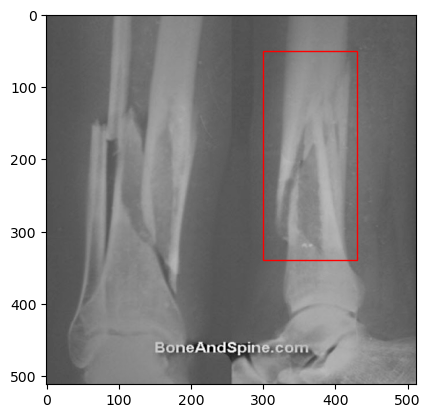

In [4]:
# Create figure and axes
fig, ax = plt.subplots()

kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE,(35,35))

# Top Hat Transform
topHat = cv.morphologyEx(img, cv.MORPH_TOPHAT, kernel)
# Black Hat Transform
blackHat = cv.morphologyEx(img, cv.MORPH_BLACKHAT, kernel)

res = img + topHat - blackHat

# Display the image
ax.imshow(res, cmap='gray')

# Create a Rectangle patch
rect = patches.Rectangle((300, 50), 130, 290, linewidth=1, edgecolor='r', facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)

In [5]:
bounding_box = np.zeros((x_train.shape[0], 4))
bounding_box_test = np.zeros((x_test.shape[0], 4))

In [ ]:
bounding_box[122] = np.array([300, 50, 130, 290])

In [6]:
def plot_images_with_bb(start, stop, bounding_box, x_train):

    for i in range(start, stop):

        if not bounding_box[i].any():
            continue

        # Create figure and axes
        fig, ax = plt.subplots()

        plt.title(f'Image {i}')

        # Display the image
        ax.imshow(x_train[i].reshape((512, 512, 3)), cmap='gray')
        
        # Create a Rectangle patch
        rect = patches.Rectangle((bounding_box[i][0], bounding_box[i][1]), 
                                 bounding_box[i][2], bounding_box[i][3], linewidth=1, edgecolor='r', facecolor='none')
        
        # Add the patch to the Axes
        ax.add_patch(rect)

/var/folders/5_/jqwpc7c52vd3nf9l7vkqwj480000gn/T/ipykernel_21472/104943692.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


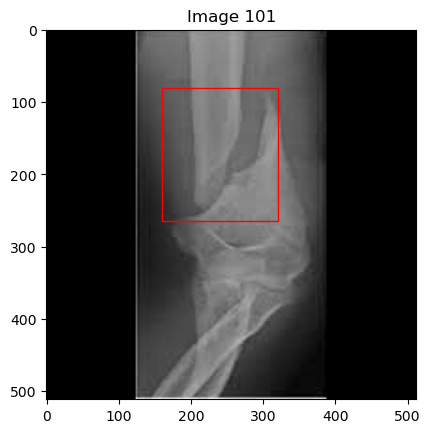

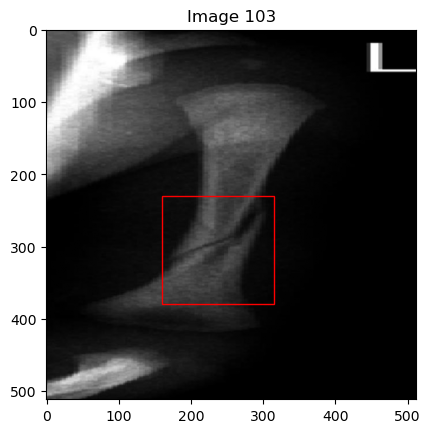

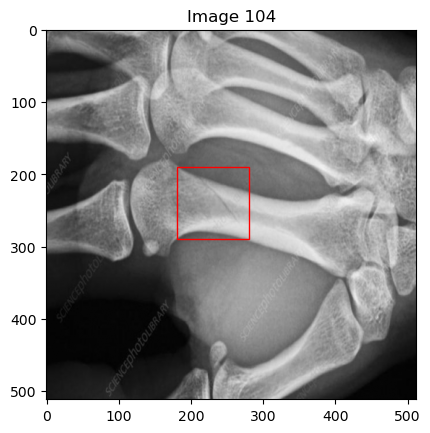

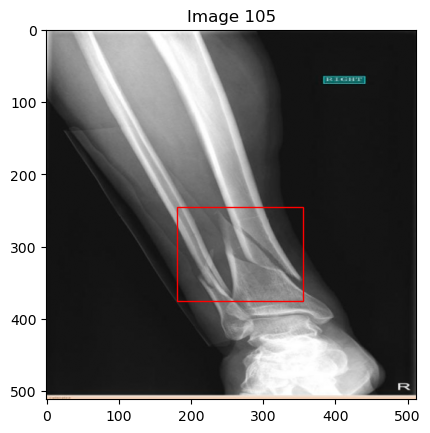

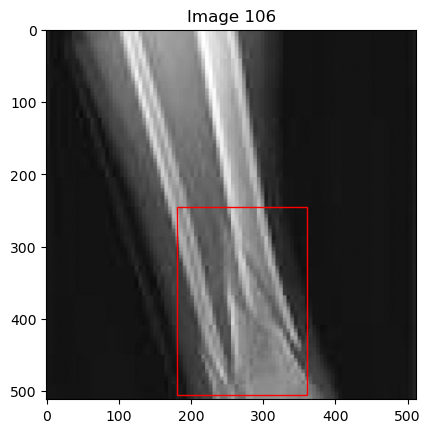

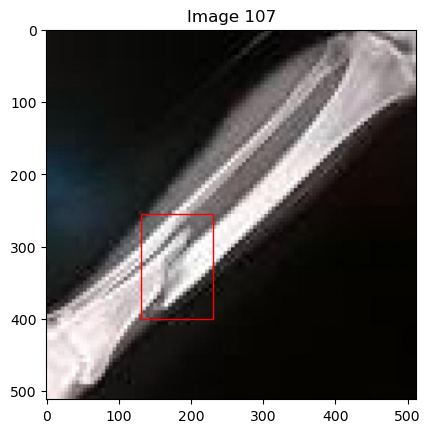

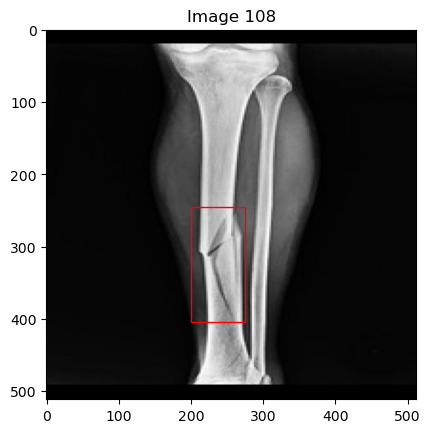

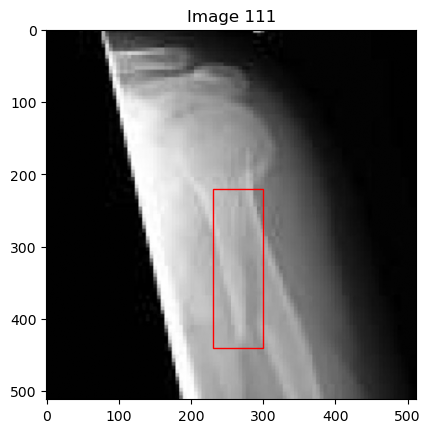

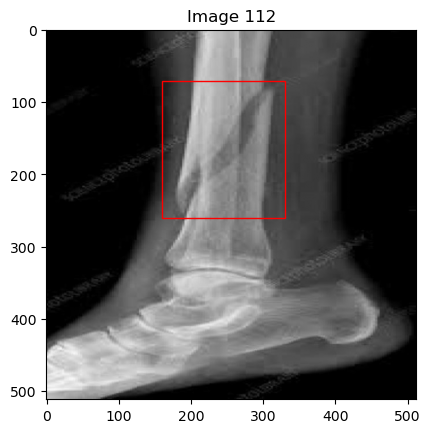

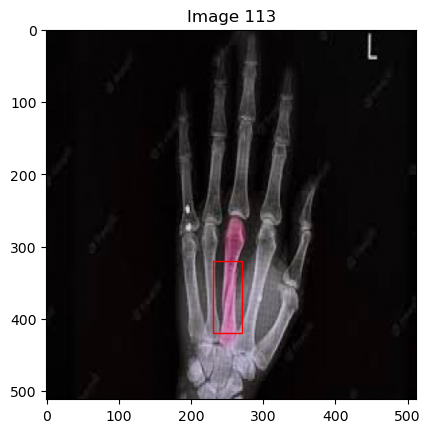

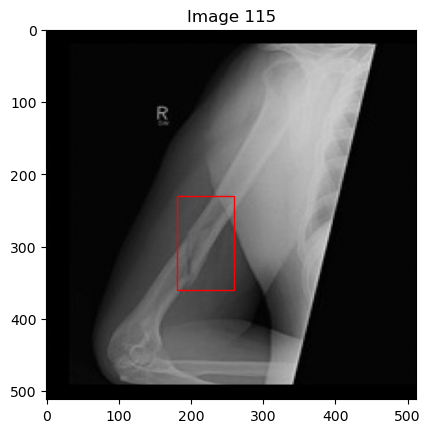

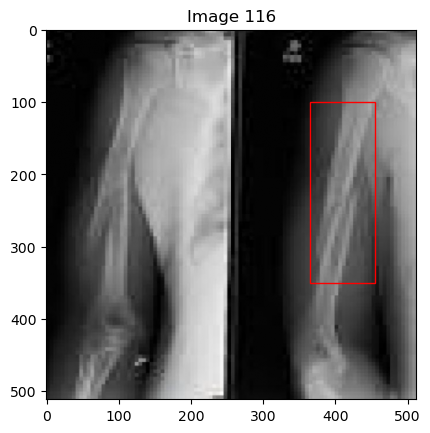

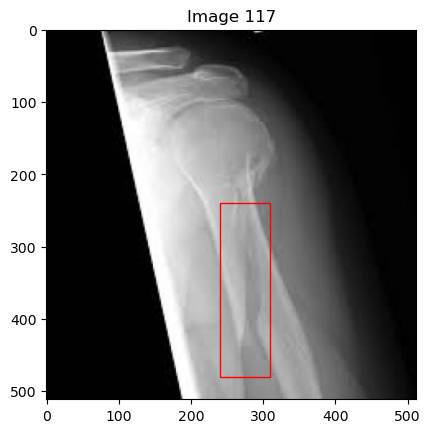

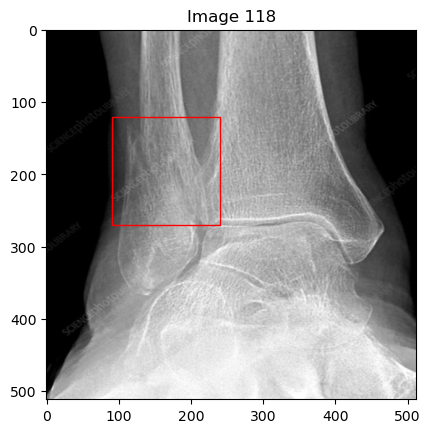

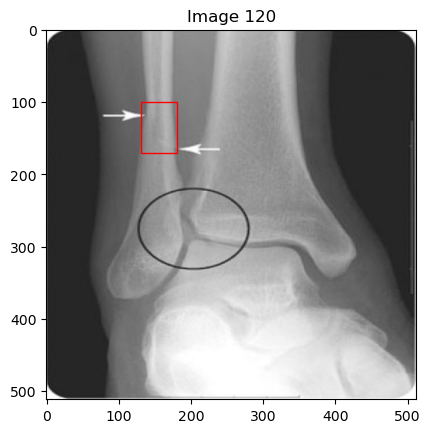

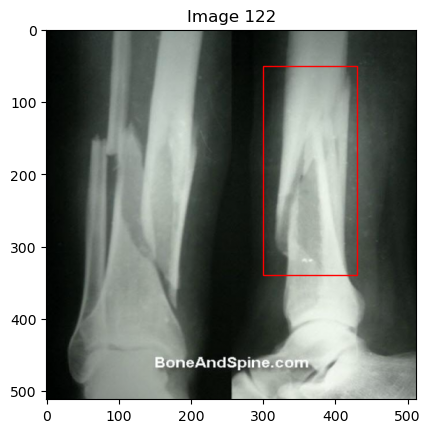

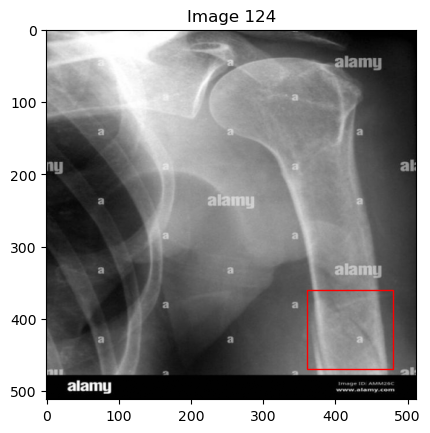

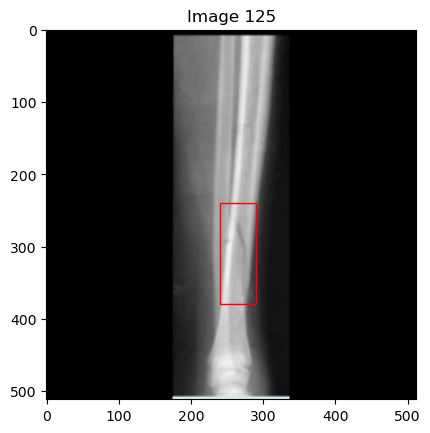

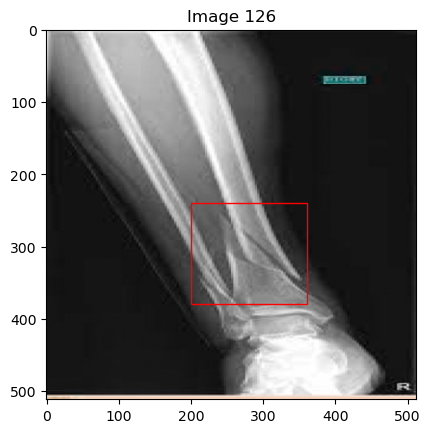

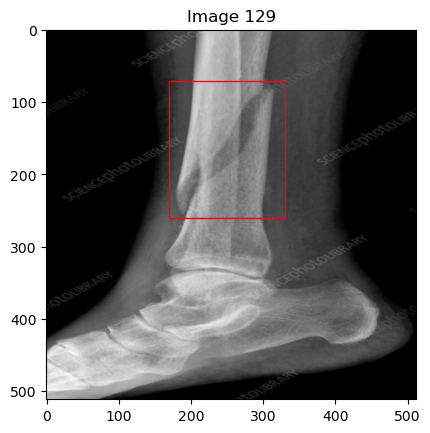

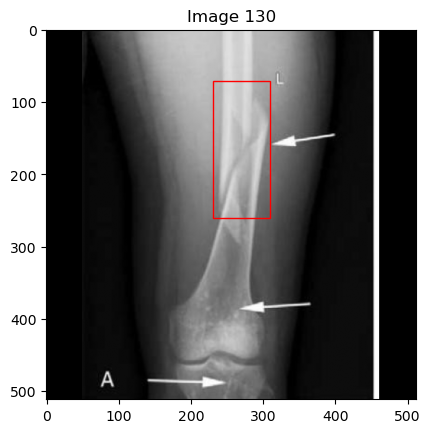

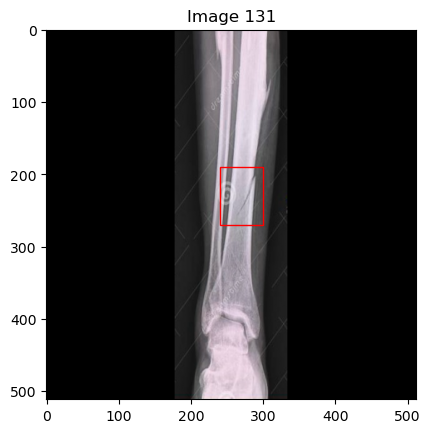

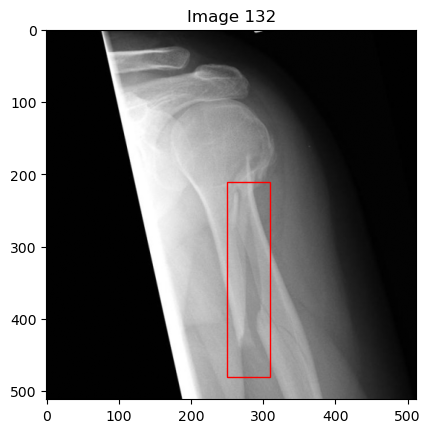

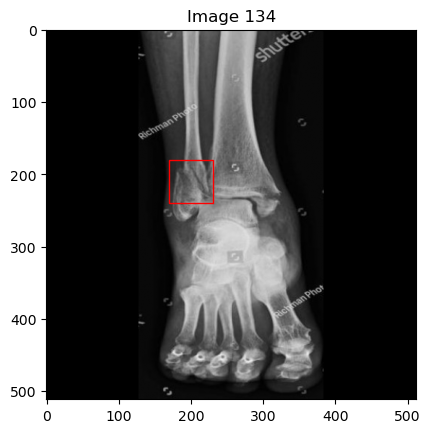

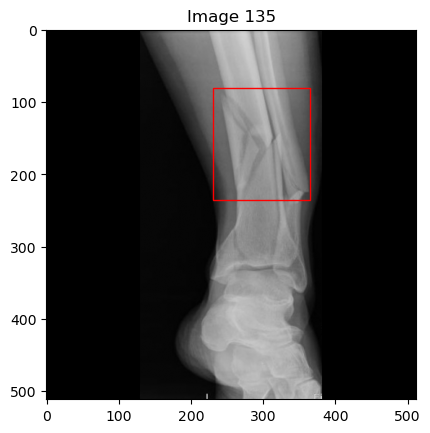

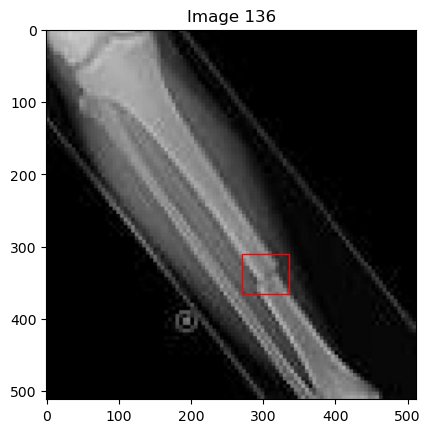

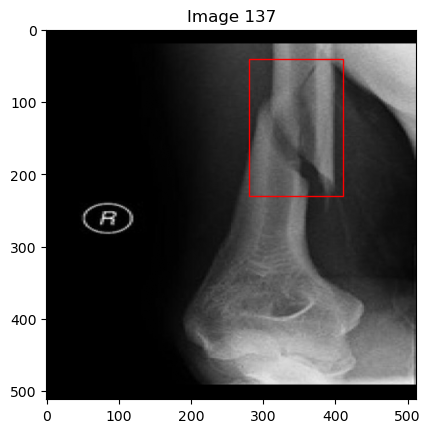

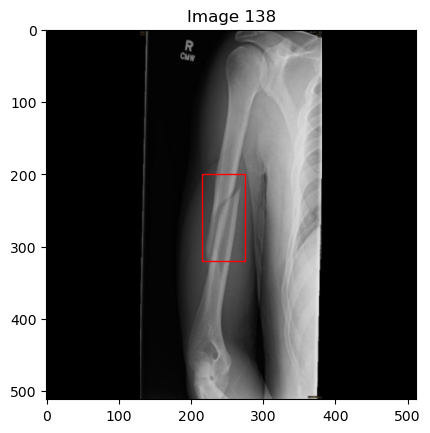

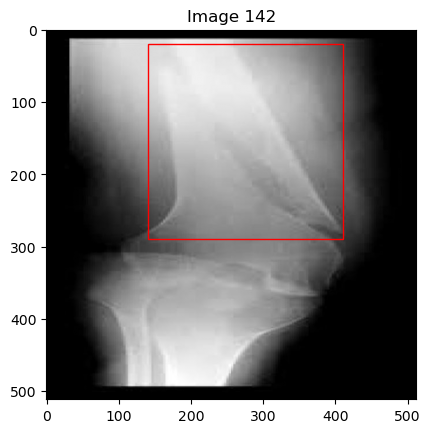

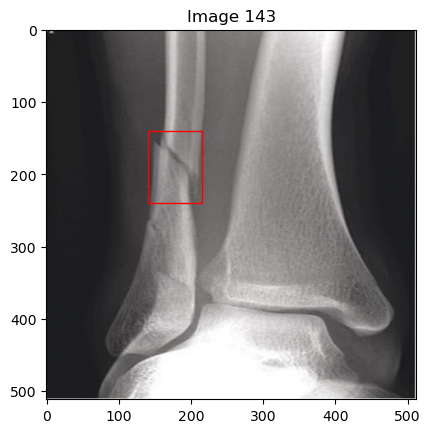

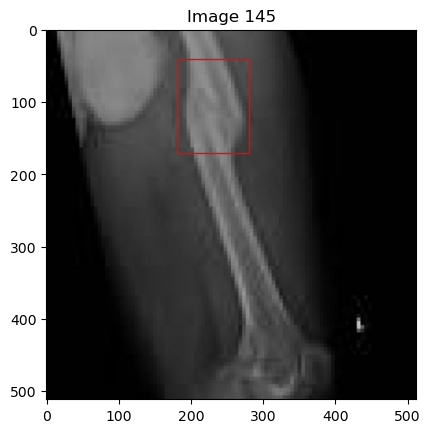

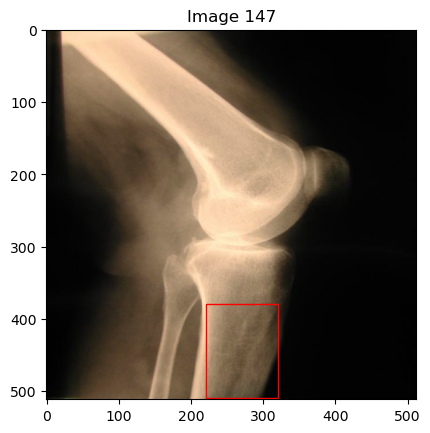

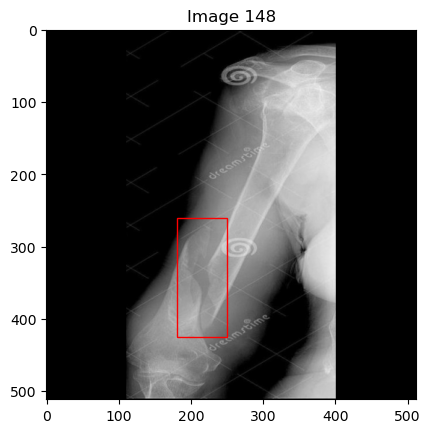

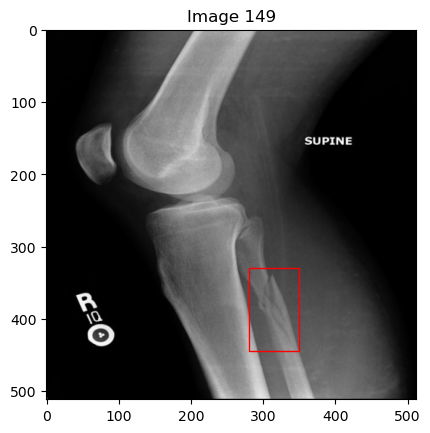

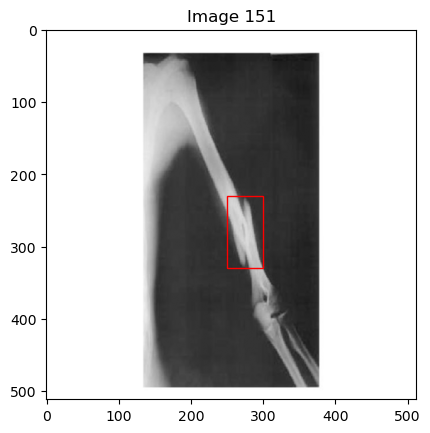

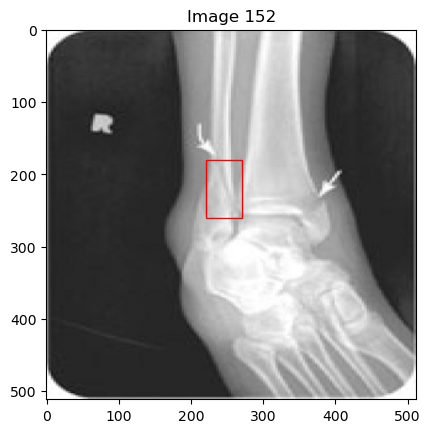

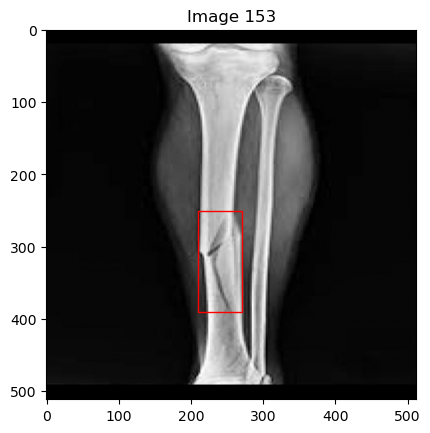

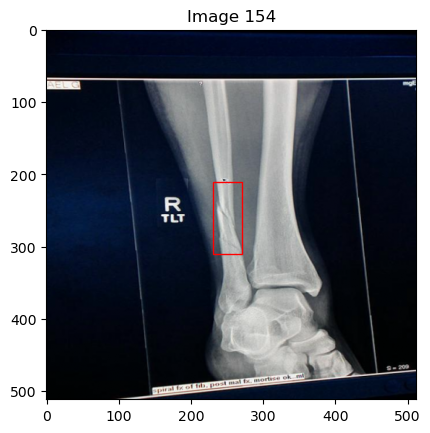

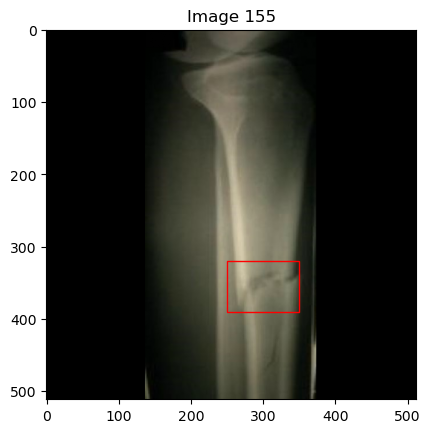

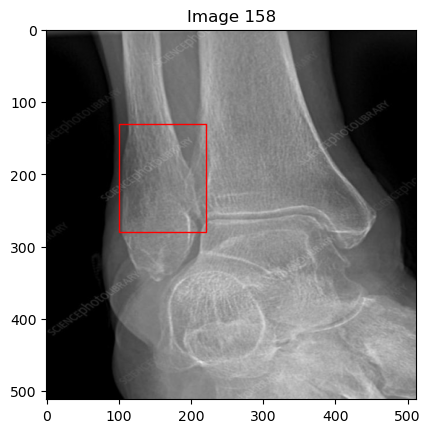

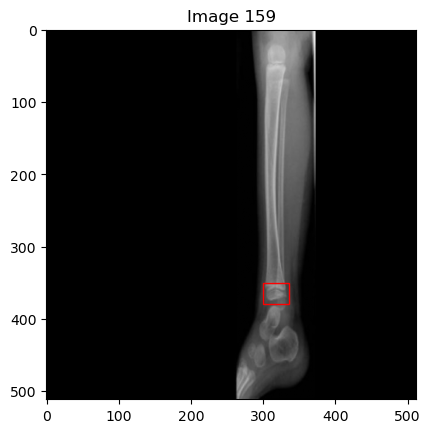

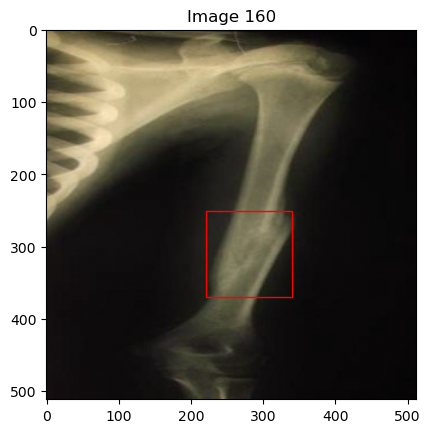

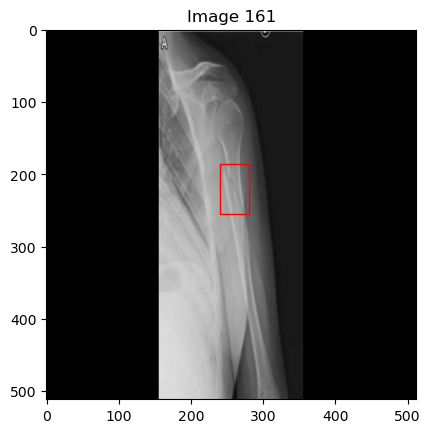

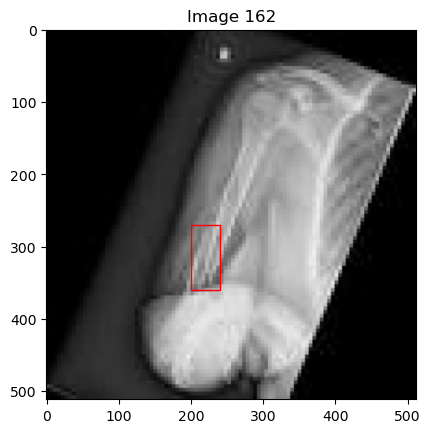

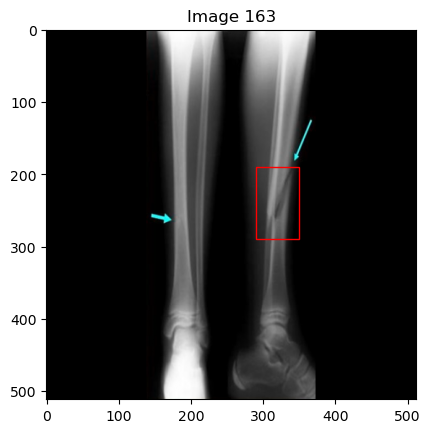

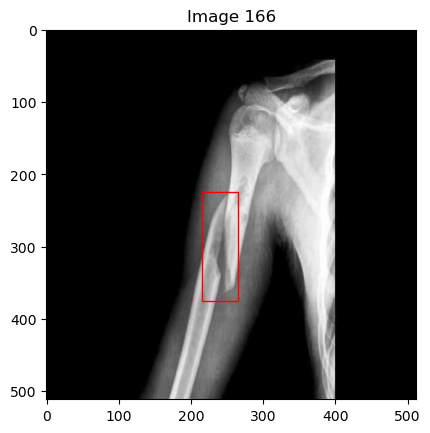

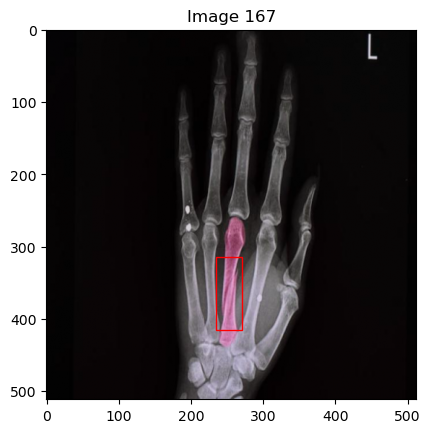

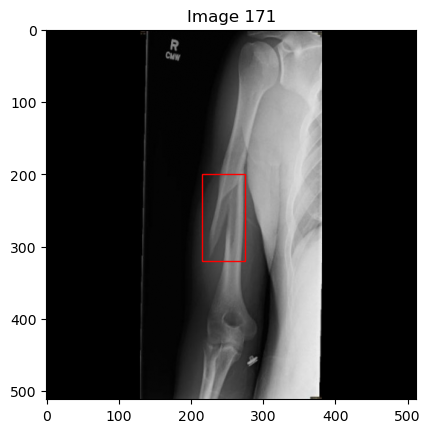

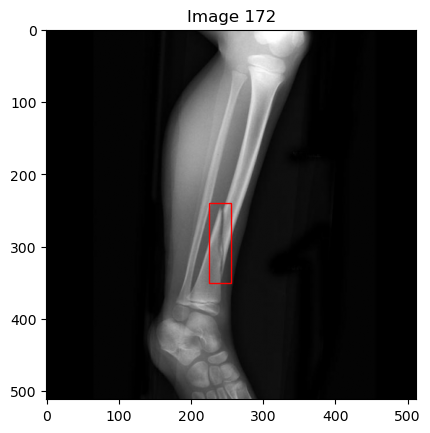

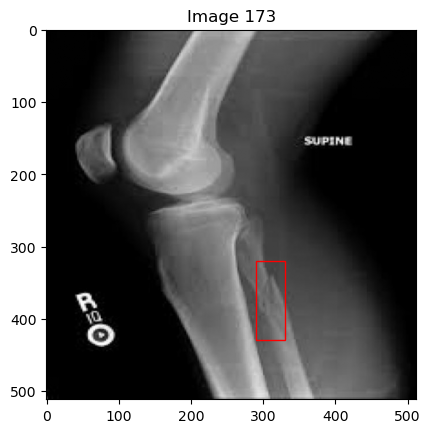

In [7]:
# Spiral Fracture
# Train
bounding_box[101] = np.array([160, 80, 160, 185])
bounding_box[103] = np.array([160, 230, 155, 150])
bounding_box[104] = np.array([180, 190, 100, 100])
bounding_box[105] = np.array([180, 245, 175, 130])
bounding_box[106] = np.array([180, 245, 180, 260])
bounding_box[107] = np.array([130, 255, 100, 145])
bounding_box[108] = np.array([200, 245, 75, 160])
bounding_box[111] = np.array([230, 220, 70, 220])
bounding_box[112] = np.array([160, 70, 170, 190])
bounding_box[113] = np.array([230, 320, 40, 100])
bounding_box[115] = np.array([180, 230, 80, 130])
bounding_box[116] = np.array([365, 100, 90, 250])
bounding_box[117] = np.array([240, 240, 70, 240])
bounding_box[118] = np.array([90, 120, 150, 150])
bounding_box[120] = np.array([130, 100, 50, 70])
bounding_box[122] = np.array([300, 50, 130, 290])
bounding_box[124] = np.array([360, 360, 120, 110])
bounding_box[125] = np.array([240, 240, 50, 140])
bounding_box[126] = np.array([200, 240, 160, 140])
bounding_box[129] = np.array([170, 70, 160, 190])
bounding_box[130] = np.array([230, 70, 80, 190])
bounding_box[131] = np.array([240, 190, 60, 80])
bounding_box[132] = np.array([250, 210, 60, 270])
bounding_box[134] = np.array([170, 180, 60, 60])
bounding_box[135] = np.array([230, 80, 135, 155])
bounding_box[136] = np.array([270, 310, 65, 55])
bounding_box[137] = np.array([280, 40, 130, 190])
bounding_box[138] = np.array([215, 200, 60, 120])
bounding_box[142] = np.array([140, 20, 270, 270])
bounding_box[143] = np.array([140, 140, 75, 100])
bounding_box[145] = np.array([180, 40, 100, 130])
bounding_box[147] = np.array([220, 380, 100, 130])
bounding_box[148] = np.array([180, 260, 70, 165])
bounding_box[149] = np.array([280, 330, 70, 115])
bounding_box[151] = np.array([250, 230, 50, 100])
bounding_box[152] = np.array([220, 180, 50, 80])
bounding_box[153] = np.array([210, 250, 60, 140])
bounding_box[154] = np.array([230, 210, 40, 100])
bounding_box[155] = np.array([250, 320, 100, 70])
bounding_box[158] = np.array([100, 130, 120, 150])
bounding_box[159] = np.array([300, 350, 35, 30])
bounding_box[160] = np.array([220, 250, 120, 120])
bounding_box[161] = np.array([240, 185, 40, 70])
bounding_box[162] = np.array([200, 270, 40, 90])
bounding_box[163] = np.array([290, 190, 60, 100])
bounding_box[166] = np.array([215, 225, 50, 150])
bounding_box[167] = np.array([235, 315, 35, 100])
bounding_box[171] = np.array([215, 200, 60, 120])
bounding_box[172] = np.array([225, 240, 30, 110])
bounding_box[173] = np.array([290, 320, 40, 110])
bounding_box[174] = np.array([150, 10, 180, 310])

plot_images_with_bb(101, 174, bounding_box, x_train)

In [ ]:
# Spiral Fracture
# Test
bounding_box_test[10] = np.array([200, 150, 130, 240])
bounding_box_test[11] = np.array([210, 60, 115, 120])
bounding_box_test[13] = np.array([80, 210, 150, 90])
bounding_box_test[14] = np.array([280, 1, 170, 90])
bounding_box_test[15] = np.array([210, 220, 80, 110])
bounding_box_test[16] = np.array([120, 250, 160, 160])
bounding_box_test[17] = np.array([200, 90, 180, 330])
bounding_box_test[18] = np.array([250, 130, 40, 80])
bounding_box_test[19] = np.array([160, 140, 55, 180])
bounding_box_test[20] = np.array([160, 240, 100, 180])
bounding_box_test[21] = np.array([230, 200, 40, 160])

/var/folders/5_/jqwpc7c52vd3nf9l7vkqwj480000gn/T/ipykernel_21472/104943692.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


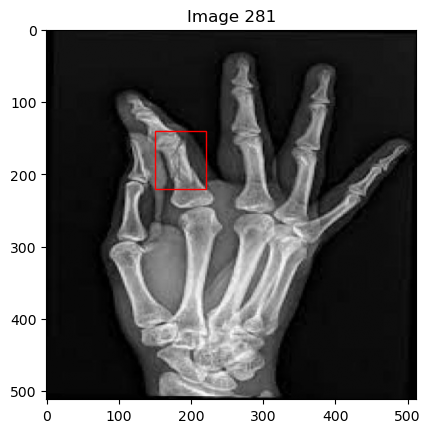

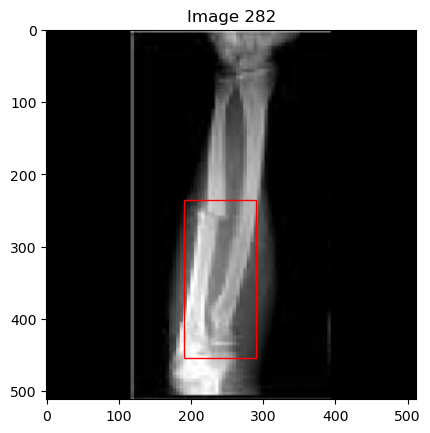

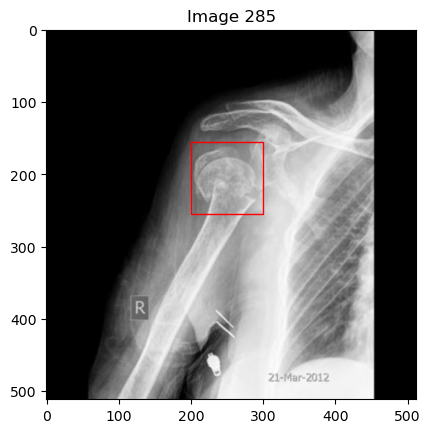

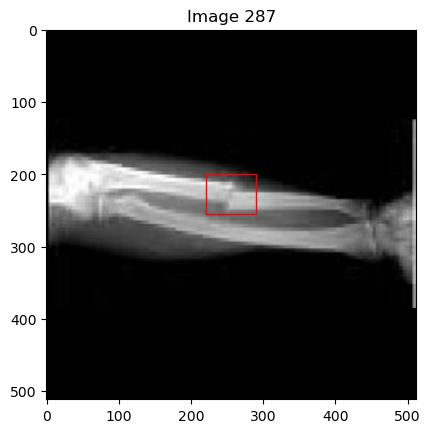

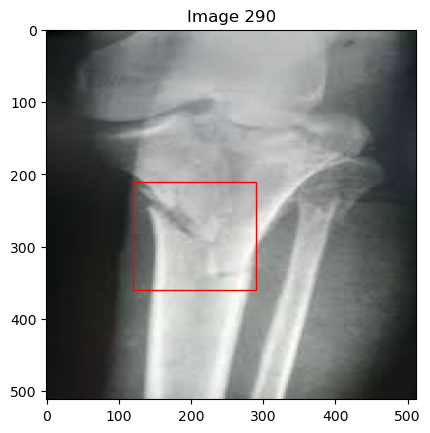

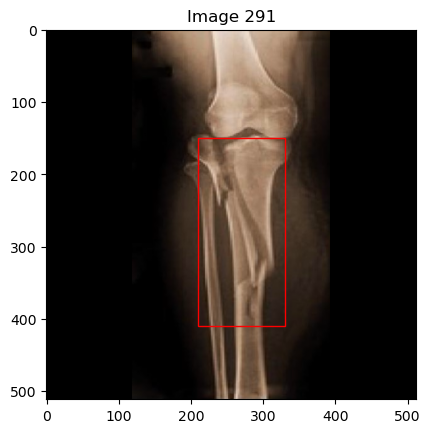

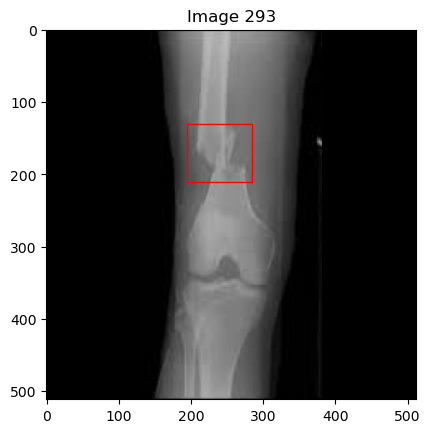

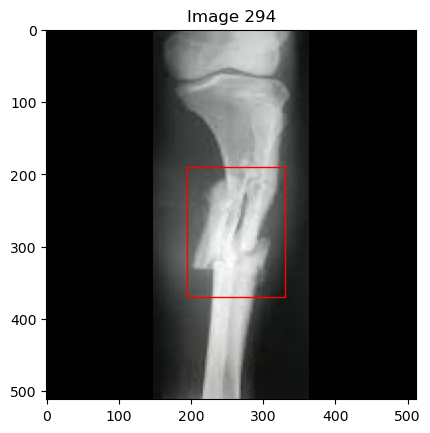

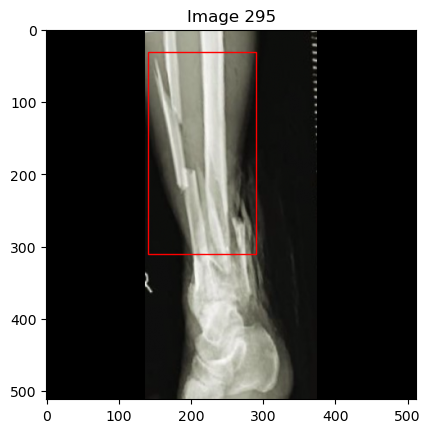

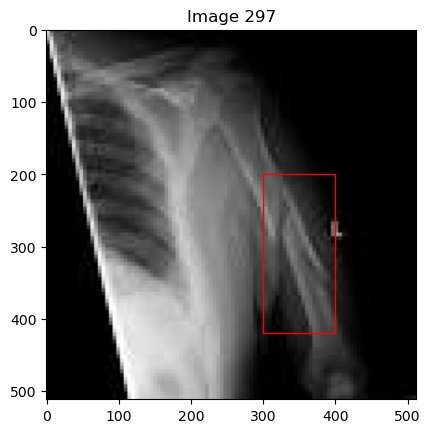

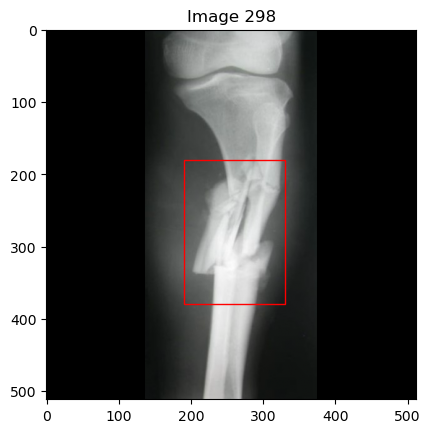

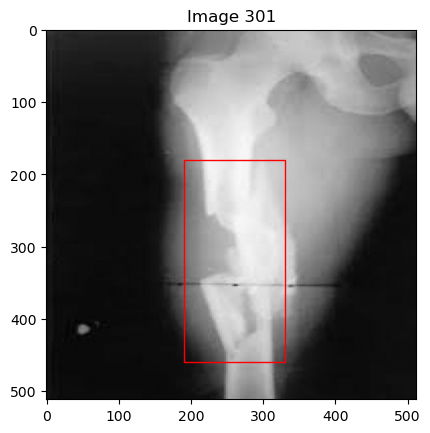

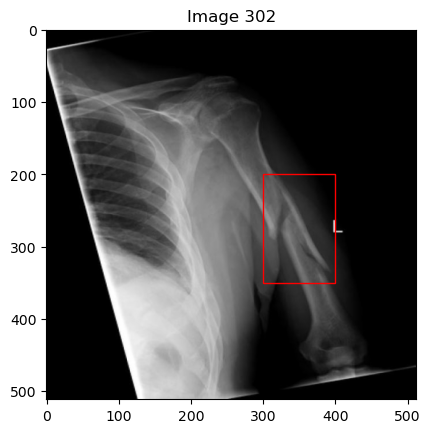

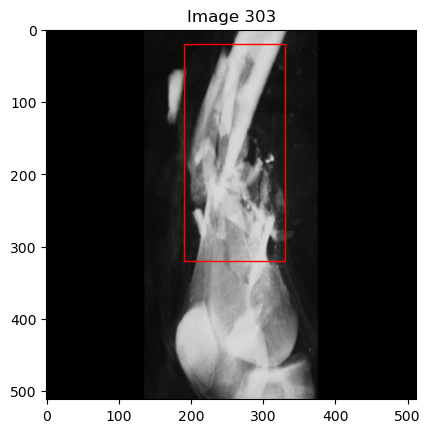

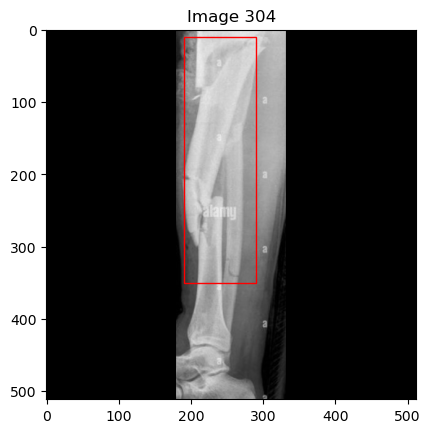

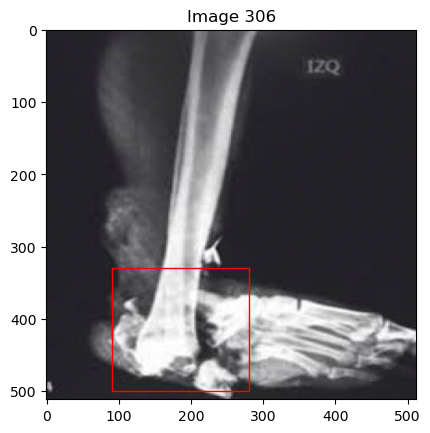

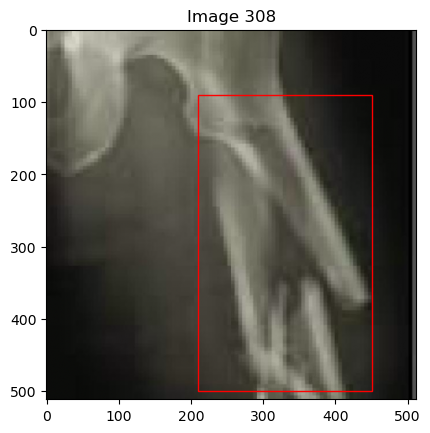

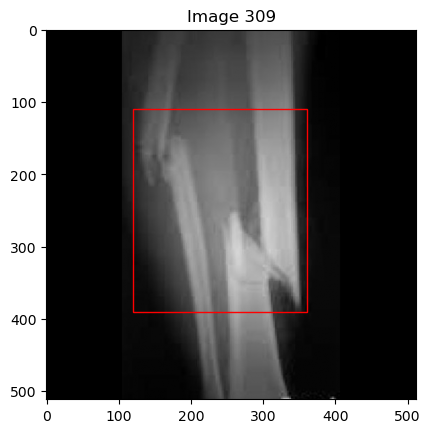

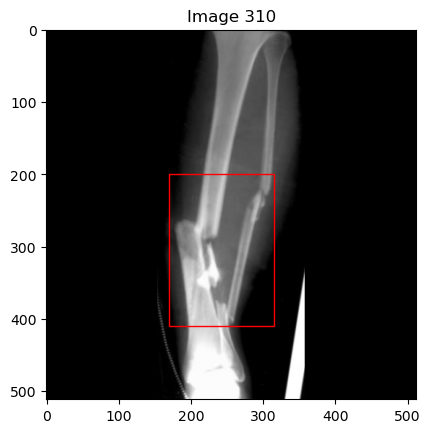

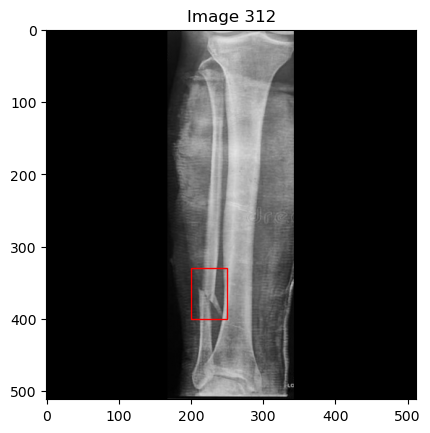

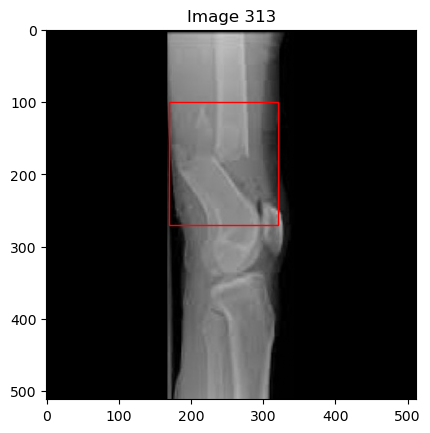

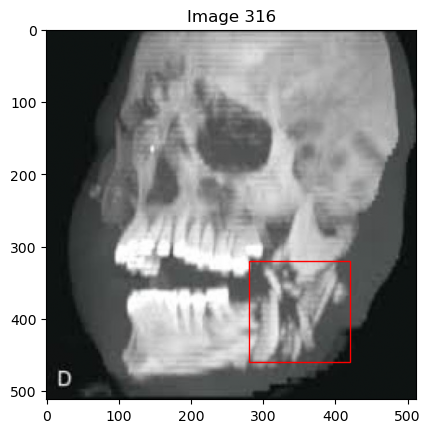

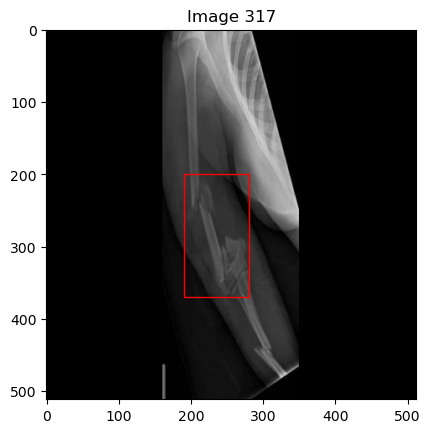

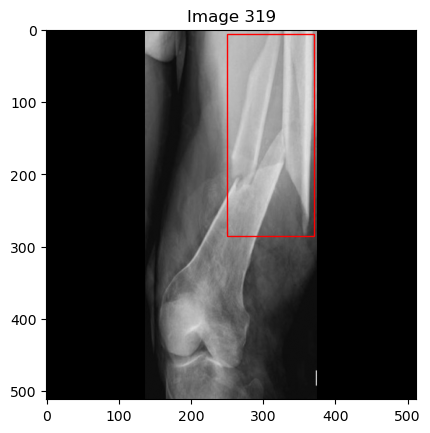

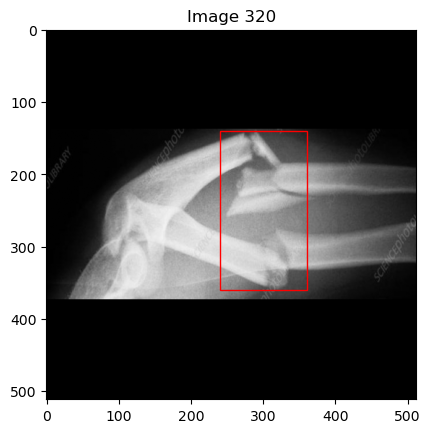

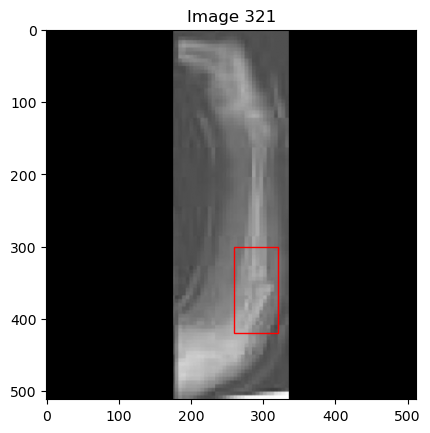

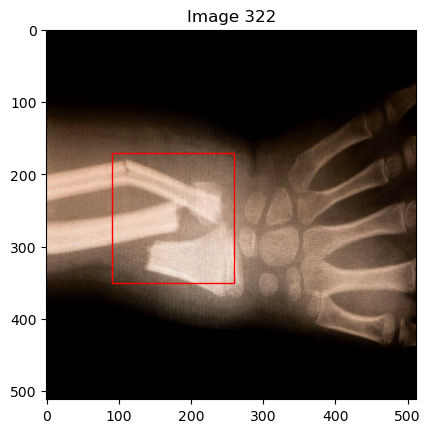

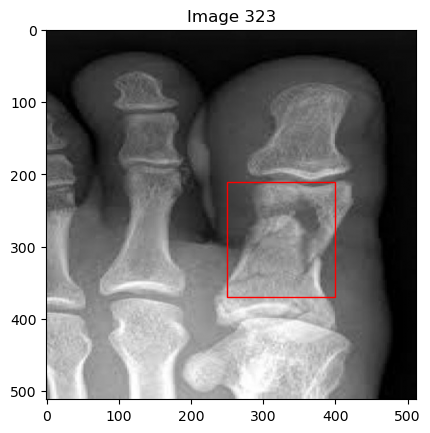

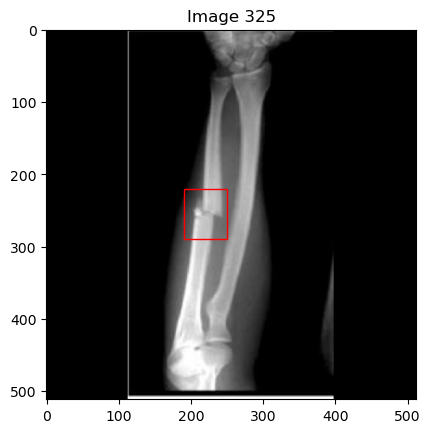

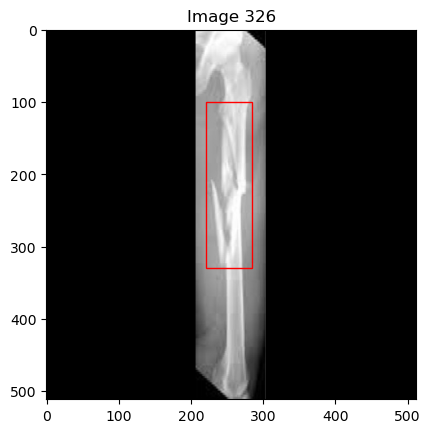

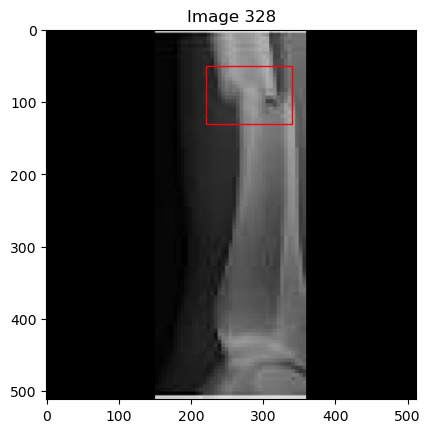

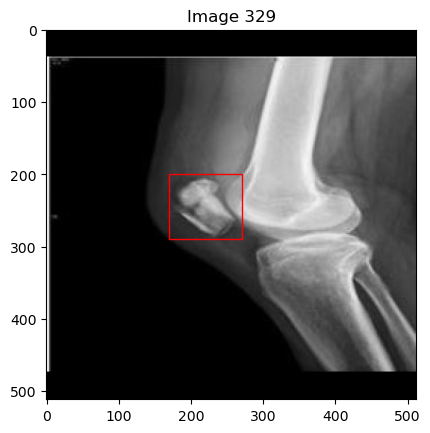

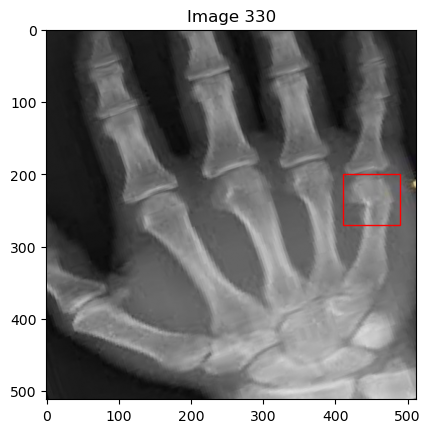

In [8]:
# Comminuted Fracture
# Train
bounding_box[281] = np.array([150, 140, 70, 80])
bounding_box[282] = np.array([190, 235, 100, 220])
bounding_box[285] = np.array([200, 155, 100, 100])
bounding_box[287] = np.array([220, 200, 70, 55])
bounding_box[290] = np.array([120, 210, 170, 150])
bounding_box[291] = np.array([210, 150, 120, 260])
bounding_box[293] = np.array([195, 130, 90, 80])
bounding_box[294] = np.array([195, 190, 135, 180])
bounding_box[295] = np.array([140, 30, 150, 280])
bounding_box[297] = np.array([300, 200, 100, 220])
bounding_box[298] = np.array([190, 180, 140, 200])
bounding_box[301] = np.array([190, 180, 140, 280])
bounding_box[302] = np.array([300, 200, 100, 150])
bounding_box[303] = np.array([190, 20, 140, 300])
bounding_box[304] = np.array([190, 10, 100, 340])
bounding_box[306] = np.array([90, 330, 190, 170])
bounding_box[308] = np.array([210, 90, 240, 410])
bounding_box[309] = np.array([120, 110, 240, 280])
bounding_box[310] = np.array([170, 200, 145, 210])
bounding_box[312] = np.array([200, 330, 50, 70])
bounding_box[313] = np.array([170, 100, 150, 170])
bounding_box[316] = np.array([280, 320, 140, 140])
bounding_box[317] = np.array([190, 200, 90, 170])
bounding_box[319] = np.array([250, 5, 120, 280])
bounding_box[320] = np.array([240, 140, 120, 220])
bounding_box[321] = np.array([260, 300, 60, 120])
bounding_box[322] = np.array([90, 170, 170, 180])
bounding_box[323] = np.array([250, 210, 150, 160])
bounding_box[325] = np.array([190, 220, 60, 70])
bounding_box[326] = np.array([220, 100, 65, 230])
bounding_box[328] = np.array([220, 50, 120, 80])
bounding_box[329] = np.array([170, 200, 100, 90])
bounding_box[330] = np.array([410, 200, 80, 70])
bounding_box[332] = np.array([210, 200, 100, 60])
bounding_box[333] = np.array([80, 200, 250, 200])
bounding_box[334] = np.array([220, 5, 170, 240])
bounding_box[336] = np.array([200, 150, 170, 260])
bounding_box[337] = np.array([85, 330, 280, 160])
bounding_box[338] = np.array([130, 70, 80, 220])
bounding_box[344] = np.array([140, 170, 185, 170])
bounding_box[345] = np.array([180, 170, 190, 130])
bounding_box[346] = np.array([220, 180, 190, 110])
bounding_box[347] = np.array([320, 10, 100, 180])
bounding_box[348] = np.array([110, 140, 330, 240])
bounding_box[349] = np.array([350, 130, 140, 70])
bounding_box[350] = np.array([250, 190, 170, 170])
bounding_box[352] = np.array([145, 170, 200, 170])
bounding_box[353] = np.array([190, 170, 120, 240])
bounding_box[354] = np.array([230, 210, 200, 190])
bounding_box[356] = np.array([80, 280, 200, 230])
bounding_box[358] = np.array([150, 250, 150, 80])
bounding_box[359] = np.array([20, 190, 230, 230])
bounding_box[360] = np.array([250, 240, 210, 245])
bounding_box[361] = np.array([250, 200, 140, 145])
bounding_box[362] = np.array([360, 210, 90, 130])
bounding_box[363] = np.array([130, 280, 110, 80])
bounding_box[365] = np.array([140, 100, 190, 280])
bounding_box[366] = np.array([100, 80, 300, 330])
bounding_box[369] = np.array([250, 250, 230, 255])
bounding_box[372] = np.array([260, 260, 115, 200])
bounding_box[375] = np.array([100, 100, 300, 230])
bounding_box[376] = np.array([50, 260, 130, 180])
bounding_box[377] = np.array([240, 10, 140, 290])
bounding_box[378] = np.array([160, 130, 110, 160])
bounding_box[379] = np.array([180, 250, 85, 160])
bounding_box[380] = np.array([230, 190, 190, 220])
bounding_box[381] = np.array([230, 145, 150, 230])
bounding_box[382] = np.array([220, 230, 70, 50])
bounding_box[383] = np.array([130, 230, 290, 180])
bounding_box[385] = np.array([210, 180, 130, 80])
bounding_box[387] = np.array([215, 180, 100, 80])
bounding_box[388] = np.array([190, 160, 120, 160])
bounding_box[389] = np.array([160, 290, 160, 200])
bounding_box[392] = np.array([90, 300, 260, 85])
bounding_box[393] = np.array([170, 10, 160, 300])
bounding_box[394] = np.array([170, 230, 160, 260])
bounding_box[395] = np.array([10, 180, 150, 220])
bounding_box[396] = np.array([170, 220, 150, 280])
bounding_box[397] = np.array([180, 350, 50, 70])
bounding_box[400] = np.array([240, 210, 150, 150])
bounding_box[401] = np.array([190, 180, 130, 250])
bounding_box[405] = np.array([130, 220, 300, 70])
bounding_box[406] = np.array([235, 160, 130, 100])
bounding_box[407] = np.array([100, 110, 140, 250])
bounding_box[408] = np.array([170, 130, 190, 200])
bounding_box[409] = np.array([90, 170, 140, 170])
bounding_box[410] = np.array([200, 300, 95, 170])
bounding_box[411] = np.array([225, 150, 70, 170])

plot_images_with_bb(281, 332, bounding_box, x_train)

In [ ]:
# Comminuted Fracture
# Test
bounding_box_test[38] = np.array([340, 130, 145, 300])
bounding_box_test[39] = np.array([150, 170, 145, 80])
bounding_box_test[40] = np.array([110, 170, 180, 220])
bounding_box_test[41] = np.array([240, 170, 160, 170])
bounding_box_test[42] = np.array([120, 130, 290, 220])
bounding_box_test[43] = np.array([20, 120, 90, 90])
bounding_box_test[44] = np.array([150, 100, 210, 230])
bounding_box_test[45] = np.array([270, 170, 80, 110])
bounding_box_test[46] = np.array([200, 180, 265, 180])
bounding_box_test[47] = np.array([170, 170, 180, 220])
bounding_box_test[48] = np.array([205, 170, 150, 290])
bounding_box_test[49] = np.array([150, 170, 210, 240])
bounding_box_test[50] = np.array([320, 300, 130, 50])
bounding_box_test[51] = np.array([250, 300, 205, 190])

In [9]:
# Greenstick Fracture
# Train
bounding_box[175] = np.array([260, 310, 50, 35])
bounding_box[177] = np.array([285, 170, 25, 50])
bounding_box[178] = np.array([240, 340, 80, 45])
bounding_box[181] = np.array([290, 250, 40, 45])
bounding_box[182] = np.array([260, 160, 80, 35])
bounding_box[183] = np.array([245, 270, 55, 35])
bounding_box[184] = np.array([180, 210, 85, 65])
bounding_box[185] = np.array([160, 300, 210, 85])
bounding_box[186] = np.array([40, 160, 110, 120])
bounding_box[189] = np.array([120, 60, 70, 55])
bounding_box[190] = np.array([210, 230, 80, 55])
bounding_box[191] = np.array([320, 90, 65, 55])
bounding_box[192] = np.array([420, 235, 30, 30])
bounding_box[193] = np.array([315, 250, 30, 25])
bounding_box[194] = np.array([155, 210, 80, 90])
bounding_box[195] = np.array([250, 210, 40, 90])
bounding_box[196] = np.array([200, 300, 120, 85])
bounding_box[197] = np.array([230, 190, 110, 110])
bounding_box[198] = np.array([390, 160, 60, 50])
bounding_box[199] = np.array([30, 390, 100, 80])
bounding_box[200] = np.array([270, 250, 45, 40])
bounding_box[201] = np.array([160, 210, 55, 45])
bounding_box[202] = np.array([280, 335, 45, 45])
bounding_box[204] = np.array([225, 320, 45, 45])
bounding_box[205] = np.array([210, 190, 100, 120])
bounding_box[206] = np.array([220, 230, 65, 50])
bounding_box[207] = np.array([220, 310, 80, 45])
bounding_box[208] = np.array([160, 260, 60, 35])
bounding_box[209] = np.array([75, 260, 80, 90])
bounding_box[210] = np.array([220, 230, 80, 50])
bounding_box[212] = np.array([200, 360, 50, 50])
bounding_box[213] = np.array([180, 230, 100, 110])
bounding_box[214] = np.array([220, 180, 65, 40])
bounding_box[215] = np.array([210, 200, 55, 50])
bounding_box[216] = np.array([230, 330, 90, 50])
bounding_box[217] = np.array([220, 180, 70, 35])
bounding_box[218] = np.array([220, 320, 75, 40])
bounding_box[219] = np.array([230, 135, 60, 30])
bounding_box[220] = np.array([220, 210, 80, 50])
bounding_box[221] = np.array([160, 270, 220, 70])
bounding_box[223] = np.array([160, 310, 140, 180])
bounding_box[224] = np.array([110, 50, 120, 130])
bounding_box[225] = np.array([220, 200, 60, 40])
bounding_box[228] = np.array([265, 250, 70, 45])
bounding_box[229] = np.array([270, 195, 90, 35])
bounding_box[230] = np.array([190, 290, 100, 45])
bounding_box[231] = np.array([150, 230, 230, 110])
bounding_box[232] = np.array([270, 240, 50, 70])
bounding_box[233] = np.array([250, 350, 70, 80])
bounding_box[234] = np.array([200, 320, 100, 80])
bounding_box[235] = np.array([220, 160, 60, 40])
bounding_box[236] = np.array([390, 260, 50, 45])
bounding_box[237] = np.array([190, 320, 130, 45])
bounding_box[238] = np.array([300, 180, 40, 35])
bounding_box[240] = np.array([240, 270, 60, 35])
bounding_box[241] = np.array([170, 190, 40, 40])
bounding_box[242] = np.array([270, 110, 70, 60])
bounding_box[243] = np.array([270, 140, 75, 55])
bounding_box[244] = np.array([190, 220, 40, 30])
bounding_box[246] = np.array([230, 250, 80, 50])
bounding_box[249] = np.array([320, 90, 70, 50])
bounding_box[250] = np.array([160, 250, 70, 60])
bounding_box[252] = np.array([140, 210, 70, 60])
bounding_box[253] = np.array([180, 280, 110, 60])
bounding_box[255] = np.array([190, 240, 60, 70])
bounding_box[256] = np.array([200, 400, 90, 70])
bounding_box[257] = np.array([260, 230, 60, 90])
bounding_box[258] = np.array([190, 200, 80, 60])
bounding_box[259] = np.array([205, 300, 95, 60])
bounding_box[260] = np.array([210, 290, 135, 50])
bounding_box[261] = np.array([290, 220, 40, 55])
bounding_box[262] = np.array([250, 210, 40, 55])
bounding_box[264] = np.array([260, 270, 35, 55])
bounding_box[265] = np.array([190, 225, 50, 80])
bounding_box[266] = np.array([190, 150, 80, 100])
bounding_box[268] = np.array([170, 300, 110, 80])
bounding_box[270] = np.array([210, 260, 100, 70])
bounding_box[271] = np.array([180, 120, 70, 30])
bounding_box[272] = np.array([240, 210, 40, 30])
bounding_box[273] = np.array([240, 215, 80, 60])
bounding_box[274] = np.array([200, 130, 140, 35])
bounding_box[275] = np.array([190, 250, 100, 80])
bounding_box[276] = np.array([270, 190, 80, 80])
bounding_box[277] = np.array([305, 390, 40, 50])
bounding_box[278] = np.array([190, 300, 40, 45])

In [ ]:
# Greenstick Fracture
# Test
bounding_box_test[24] = np.array([300, 240, 50, 70])
bounding_box_test[25] = np.array([220, 300, 50, 60])
bounding_box_test[26] = np.array([270, 190, 80, 50])
bounding_box_test[27] = np.array([190, 250, 110, 50])
bounding_box_test[28] = np.array([240, 425, 35, 35])
bounding_box_test[29] = np.array([180, 250, 100, 65])
bounding_box_test[30] = np.array([240, 200, 50, 55])
bounding_box_test[31] = np.array([220, 410, 60, 55])
bounding_box_test[32] = np.array([200, 240, 110, 55])
bounding_box_test[33] = np.array([210, 320, 90, 70])
bounding_box_test[34] = np.array([140, 205, 70, 80])
bounding_box_test[35] = np.array([265, 140, 65, 40])
bounding_box_test[37] = np.array([180, 230, 80, 110])

In [10]:
# Avulsion Fracture
# Train
bounding_box[880] = np.array([250, 320, 120, 170])
bounding_box[881] = np.array([290, 230, 100, 70])
bounding_box[883] = np.array([295, 220, 80, 70])
bounding_box[884] = np.array([210, 250, 40, 70])
bounding_box[885] = np.array([30, 210, 40, 50])
bounding_box[886] = np.array([150, 320, 70, 70])
bounding_box[888] = np.array([250, 270, 70, 70])
bounding_box[890] = np.array([190, 270, 30, 70])
bounding_box[891] = np.array([250, 330, 70, 70])
bounding_box[892] = np.array([180, 90, 70, 70])
bounding_box[892] = np.array([180, 90, 70, 70])
bounding_box[897] = np.array([160, 80, 70, 70])
bounding_box[899] = np.array([60, 250, 60, 70])
bounding_box[900] = np.array([200, 270, 100, 120])
bounding_box[901] = np.array([70, 110, 100, 70])
bounding_box[902] = np.array([70, 120, 70, 70])
bounding_box[905] = np.array([290, 150, 90, 100])
bounding_box[906] = np.array([180, 220, 70, 90])
bounding_box[907] = np.array([410, 270, 40, 70])
bounding_box[909] = np.array([310, 180, 110, 90])
bounding_box[909] = np.array([310, 180, 110, 90])
bounding_box[913] = np.array([290, 200, 30, 90])
bounding_box[914] = np.array([65, 90, 45, 80])
bounding_box[915] = np.array([65, 130, 30, 30])
bounding_box[916] = np.array([190, 280, 40, 50])
bounding_box[917] = np.array([350, 220, 40, 70])
bounding_box[921] = np.array([270, 220, 40, 100])
bounding_box[924] = np.array([240, 330, 40, 90])
bounding_box[927] = np.array([260, 245, 70, 60])
bounding_box[928] = np.array([315, 55, 50, 40])
bounding_box[928] = np.array([315, 55, 50, 40])
bounding_box[930] = np.array([315, 150, 50, 70])
bounding_box[931] = np.array([170, 220, 50, 80])
bounding_box[932] = np.array([360, 250, 80, 90])
bounding_box[933] = np.array([90, 450, 40, 50])
bounding_box[934] = np.array([220, 250, 70, 60])
bounding_box[935] = np.array([210, 280, 40, 40])
bounding_box[936] = np.array([400, 200, 85, 90])
bounding_box[937] = np.array([40, 260, 65, 80])
bounding_box[939] = np.array([150, 220, 100, 60])
bounding_box[940] = np.array([80, 190, 90, 170])
bounding_box[941] = np.array([150, 200, 50, 100])
bounding_box[944] = np.array([340, 140, 40, 90])
bounding_box[945] = np.array([160, 80, 40, 70])
bounding_box[948] = np.array([350, 210, 50, 120])
bounding_box[949] = np.array([70, 430, 60, 50])
bounding_box[951] = np.array([190, 180, 80, 50])
bounding_box[952] = np.array([190, 260, 60, 50])
bounding_box[953] = np.array([180, 110, 65, 70])
bounding_box[956] = np.array([250, 280, 40, 40])
bounding_box[957] = np.array([270, 90, 60, 80])
bounding_box[962] = np.array([230, 410, 60, 70])
bounding_box[963] = np.array([70, 240, 80, 80])
bounding_box[964] = np.array([260, 90, 130, 60])
bounding_box[965] = np.array([100, 280, 90, 60])
bounding_box[969] = np.array([80, 190, 90, 80])
bounding_box[970] = np.array([400, 260, 45, 70])
bounding_box[971] = np.array([90, 110, 70, 80])
bounding_box[972] = np.array([400, 380, 50, 70])
bounding_box[975] = np.array([280, 260, 50, 90])
bounding_box[977] = np.array([300, 120, 40, 40])
bounding_box[980] = np.array([370, 230, 70, 60])
bounding_box[984] = np.array([340, 230, 60, 60])
bounding_box[986] = np.array([155, 250, 40, 40])

In [ ]:
# Avulsion Fracture
# Test
bounding_box_test[126] = np.array([250, 230, 40, 50])
bounding_box_test[127] = np.array([280, 240, 70, 50])
bounding_box_test[130] = np.array([330, 160, 45, 70])
bounding_box_test[131] = np.array([60, 250, 45, 50])
bounding_box_test[132] = np.array([110, 290, 60, 40])
bounding_box_test[133] = np.array([270, 30, 80, 60])
bounding_box_test[134] = np.array([370, 240, 50, 50])
bounding_box_test[135] = np.array([270, 200, 30, 70])
bounding_box_test[138] = np.array([140, 390, 70, 70])
bounding_box_test[139] = np.array([25, 330, 60, 60])

In [18]:
index1, index2 = np.nonzero(bounding_box)
X_train = x_train[np.unique(index1)]
Y_train = bounding_box[np.unique(index1)]

In [68]:
# Define the K-fold Cross Validator
kfold = KFold(n_splits=5, shuffle=True)

# K-fold Cross Validation model evaluation
fold_no = 1
acc_per_fold = []
loss_per_fold = []
for train, test in kfold.split(X_train, Y_train):

    image_input = layers.Input(shape=(X_train.shape[1], X_train.shape[2], X_train.shape[3]))
    x = layers.Conv2D(64, (3, 3), activation='relu')(image_input)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Conv2D(128, (3, 3), activation='relu')(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Flatten()(x)
    x = layers.Dense(32, activation='relu')(x)
    output = layers.Dense(4)(x)
    
    model = models.Model(inputs=[image_input], outputs=output)
    model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['accuracy'])

    # Generate a print
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')

    checkpoint = ModelCheckpoint(os.path.join("models", "model.keras"), monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
    
    history = model.fit(X_train, Y_train,
              batch_size=8,
              epochs=20,
              verbose=1,
              validation_data=(X_train[test], Y_train[test]),
              callbacks=[
                 checkpoint
              ])

    # Generate generalization metrics
    scores = model.evaluate(X_train[test], Y_train[test], verbose=0)
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])
    
    # Increase fold number
    fold_no = fold_no + 1
    break

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 9s/step - accuracy: 0.4081 - loss: 92.8913WARNING:tensorflow:5 out of the last 9 calls to <function TensorFlowTrainer.make_test_function.<locals>.one_step_on_iterator at 0x1553e2ac0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.

Epoch 1: val_accuracy improved from -inf to 0.42105, saving model to models/model.keras


OSError: [Errno 28] Can't write data (file write failed: time = Sun Jul 28 11:13:14 2024
, filename = 'models/model.weights.h5', file descriptor = 92, errno = 28, error message = 'No space left on device', buf = 0x7f7847e8f000, total write size = 260112384, bytes this sub-write = 260112384, bytes actually written = 18446744073709551615, offset = 0)

In [58]:
model.predict(X_train[90].reshape(1, 512, 512, 3))

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


array([[205.14188 , 260.25177 , 145.62384 ,  84.128944]], dtype=float32)

In [59]:
img = X_train[90].reshape(512, 512, 3)

In [44]:
Y_train[10]

array([180., 230.,  80., 130.])

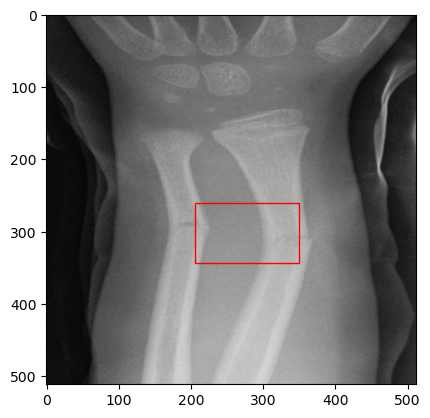

In [60]:
# Create figure and axes
fig, ax = plt.subplots()

# Display the image
ax.imshow(img, cmap='gray')

# Create a Rectangle patch
rect = patches.Rectangle((205, 260), 145, 84, linewidth=1, edgecolor='r', facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)